# Coddington's equations for grazing angle mirrors
awojdyla@lbl.gov - November 2018

We implement the Coddington's equations to compute the radius of curvature for a mirror.

– based on `20181118 Toroid tolerance (analytical astigmatism).ipynb`

In [155]:
import numpy as np
import matplotlib.pyplot as plt

## Focusing optics parameters

In [156]:
# object distance
#p_m = 31.4
p_m = 15
# image distance
q_m = 4.2
# grazing angle
theta_rad = 1.5*np.pi/180

In [157]:
# focal length
f_m = 1/(1/p_m + 1/q_m)
# tangential radius of curvature
R_m = 1/((1/p_m+1/q_m)*np.sin(theta_rad)/2)
# sagittal radius of curvature
rho_m = 1/((1/p_m+1/q_m)/(np.sin(theta_rad)*2))
print("tangential radius of curvature: %1.1f m" %(R_m))
print("sagittal radius of curvature:   %1.1f mm" %(rho_m*1e3))

tangential radius of curvature: 250.7 m
sagittal radius of curvature:   171.8 mm


## depth of focus

In [158]:
# ALS-U/COSMIC photon beam parameters at 260eV

# wavelength
lambda_m = 5e-9
# source size
x_m = 25e-6
# source divergence
xp_rad = 35e-6

In [159]:
# depth of focus

# magnification
mag = p_m/q_m
# depth of focus
zd_m = lambda_m/(2*xp_rad*mag)**2

print(" Wavelength:      {:.1f} nm".format(lambda_m*1e9,format_spec="3.1f"))
print(" depth of focus: {:.1f} mm".format(zd_m*1e3,format_spec="3.1f"))

 Wavelength:      5.0 nm
 depth of focus: 80.0 mm


In [160]:
# Rayleigh distance
zr_m = np.pi*(x_m/mag)**2/lambda_m
print(" Wavelength:         {:.1f} nm".format(lambda_m*1e9,format_spec="3.1f"))
print(" Rayleigh distance: {:.1f} mm".format(zr_m*1e3,format_spec="3.1f"))

 Wavelength:         5.0 nm
 Rayleigh distance: 30.8 mm


## alignment tolerance budget
This works for a coherent beam on an undulator of length L

In [161]:
#p_m = 31.4
p_m = 15
# image distance
q_m = 4.2
# grazing angle
ga_rad = 1.5*np.pi/180

mag = p_m/q_m # magnification
L_und_m = 2 # length of undulator

# q1’/q1 = sin(2θ)/sin(2θ1) ----
# “natural dof” = √2·2Lund·M2/(4π)
# 0.32·2Lund·Mag**2*θ/(4πq)
theta_budget_rad = np.sqrt(1.05**2-1)*2*(L_und_m*mag**2)*2*(ga_rad*np.pi/180)/(4*np.pi*q_m)
print("alignment error budget: {:.1f} urad".format(theta_budget_rad*1e6,format_spec="3.1f"))

alignment error budget: 282.8 urad


## curvature budget

In [162]:
#R = 2/(sinθ) * pq/(p+q); Flat mirror: q=-p ; with q’=q+dof, residual ROC (p_m^2/dof_m)·(2/sin(theta_rad))
dof_m = L_und_m/np.pi # depth of focus for an undulator

ROC_tolerance_m = (p_m**2/dof_m)*(2/np.sin(theta_rad))
print("residual ROC tolerance: {:.1f} km".format(ROC_tolerance_m*1e-3,format_spec="3.1f"))


residual ROC tolerance: 27.0 km


## Study of astigmatism for toroidal mirrors

In [163]:
qt  = lambda theta: 1/(2/(R_m*np.sin(theta))-1/p_m)
qs  = lambda theta: 1/(2*np.sin(theta)/(rho_m)-1/p_m)

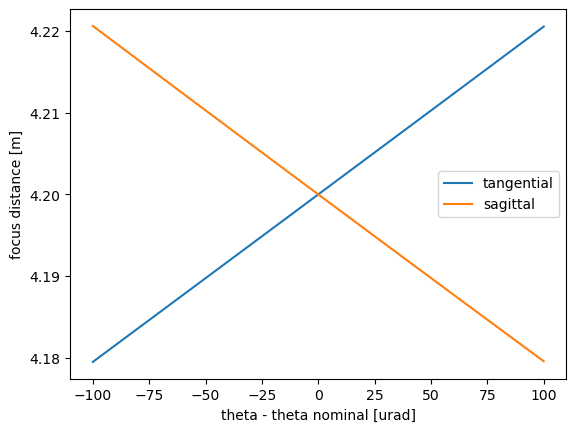

In [164]:
theta = theta_rad + np.linspace(-1,1,201)*0.1e-3

plt.plot((theta-theta_rad)*1e6, qt(theta),(theta-theta_rad)*1e6, qs(theta))
plt.xlabel('theta - theta nominal [urad]')
plt.ylabel('focus distance [m]')
plt.legend(['tangential','sagittal'])
plt.show()

## tolerance to detuning

In [165]:
p_m = 20
# image distance
q_m = 5
# grazing angle
theta_rad = (1.25)*np.pi/180


# tangential radius of curvature
R_m = 1/((1/p_m+1/q_m)*np.sin(theta_rad)/2)
# sagittal radius of curvature
rho_m = 1/((1/p_m+1/q_m)/(np.sin(theta_rad)*2))

# detune angle [
detune_angle_rad = (0.01)*np.pi/180

#new tangential object distance [m]
qt_m=-1/(1/p_m-2/(R_m*np.sin(theta_rad+detune_angle_rad)))
# new sagittal object distance [m]
qs_m=-1/(1/p_m-2*np.sin((theta_rad+detune_angle_rad))/(rho_m))

# distance betweeen nominal and detuned focus
dqt_m = qt_m - q_m
dqs_m = qs_m - q_m
print("detune angle: {:.1f} mrad".format(detune_angle_rad*1e3,format_spec="3.1f"))  
print("tangential detune: {:.1f} mm".format(dqt_m*1e3,format_spec="3.1f"))
print("sagittal detune:   {:.1f} mm".format(dqs_m*1e3,format_spec="3.1f"))

detune angle: 0.2 mrad
tangential detune: 50.1 mm
sagittal detune:   -49.5 mm


In [166]:
deflection_m = 2*np.sin(detune_angle_rad)
print('additional deflection: %1.3fmm' % (deflection_m*1e3))

additional deflection: 0.349mm


## Effective source distance for a flat mirror with spherical deformation

In [167]:
# source distance (or secondary source distance)
p_m = 20
# grazing angle
theta0_rad = (1.25)*np.pi/180

R_m = -10000 # may depend on theta0_rad 
qr_m = 1/(2/(R_m*np.sin(theta0_rad))-1/p_m)

## new "virtual" source distance for a focusing mirror upstream
pr_m = -qr_m
print("virtual source distance: %1.1f m" %(pr_m))
# compare the differential source position with undulator length (2m) if the source is the undulator.

virtual source distance: 16.9 m


## Ellipses

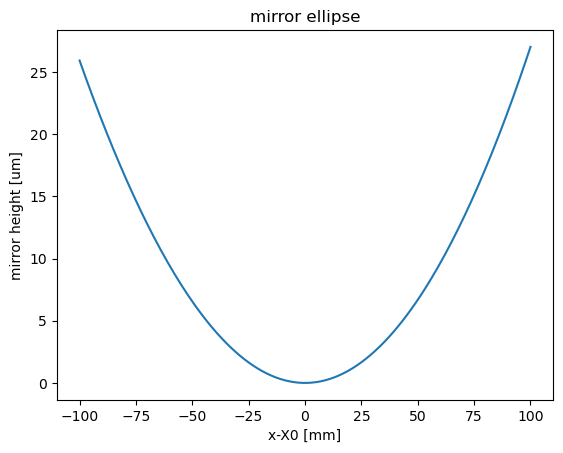

In [168]:
# Formulas from Daniele Cocco's disertation (they can also be found in Peatman p.72)

# object distance
p_m = 27.672
# image distance
q_m = 2.228
# grazing angle
ga_rad = 1.25*np.pi/180

# angle of incidence
theta_inc_rad = np.pi/2-ga_rad

# Ellipse characteristics
## semi-major axis
a_m = (p_m+q_m)/2
# eccentricity
ecc = 1/(2*a_m)*np.sqrt(p_m**2+q_m**2-2*p_m*q_m*np.cos(2*theta_inc_rad))
# semi-minor axis
b_m = np.sqrt(a_m**2*(1-ecc**2))
# focal distance
f_m = np.sqrt(a_m**2-b_m**2)

# poles (where the center of the mirror is located)
Y01_m = p_m*q_m*np.sin(2*theta_inc_rad)/(2*a_m*ecc)
X01_m = a_m*np.sqrt(1-Y01_m**2/b_m**2)

# centered coordinates
x_m = np.linspace(-100e-3, 100e-3,201)
# handle for ellipse equation 
yh_m  = lambda x_m: -np.sqrt(1-x_m**2/a_m**2)*b_m

# coordinates centered on the ellipse
xc_m = x_m + X01_m
y_m = yh_m(xc_m)

#plt.plot(xc_m, y_m-slope0_rad*x_m)

#local slope (remove for display)
slope0_rad= (yh_m(X01_m+1e-6)-yh_m(X01_m))/(1e-6)

plt.plot((xc_m-X01_m)*1e3, (y_m+Y01_m-slope0_rad*x_m)*1e6)
#plt.plot((xc_m-X01_m)*1e3, (y_m))
#plt.plot(xc_m, dydx*x_m)
plt.xlabel('x-X0 [mm]')
plt.ylabel('mirror height [um]')
plt.title('mirror ellipse')
plt.show()

### sag and slope variation

In [169]:
# mirror length
Lm_m = 200e-3
# measured sag
dh_m = 25e-6

# true radius of curvature
R_m = 1/((1/p_m+1/q_m)*np.sin(ga_rad)/2)
# estimate of radius of curvature
Re_m = Lm_m**2/(8*dh_m) # = (Lm_m/2)**2/(2*dh_m)

# estimate of slope variation between
slope_e_rad = 2*Lm_m/(4*Re_m) #(= dh(·)/dx|L/2)

In [170]:
print("true radius of curvature:      %1.1f m" %(R_m))
print("estimated radius of curvature: %1.1f m" %(Re_m))
print("slope range center-to-edge     %1.1f urad" %(slope_e_rad*1e6))


true radius of curvature:      189.0 m
estimated radius of curvature: 200.0 m
slope range center-to-edge     500.0 urad


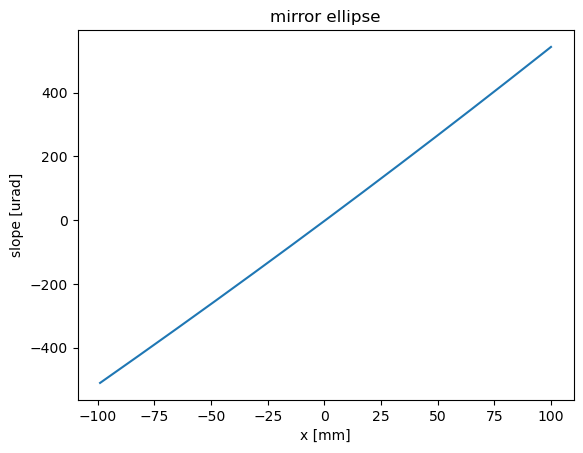

In [171]:
height_mirror_m = (y_m+Y01_m-slope0_rad*x_m)
slope_mirror_rad = (height_mirror_m[1:]-height_mirror_m[:-1])/(x_m[1:]-x_m[:-1])
plt.plot((xc_m[1:]-X01_m)*1e3, slope_mirror_rad*1e6)
#plt.plot((xc_m-X01_m)*1e3, (y_m))
#plt.plot(xc_m, dydx*x_m)
plt.xlabel('x [mm]')
plt.ylabel('slope [urad]')
plt.title('mirror ellipse')
plt.show()